In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_excel('oasis_longitudinal_demographics.xlsx')



In [3]:
print("Tota Rows and Columns (Rows,Columns) : ",df.shape)
df.head(5)

Tota Rows and Columns (Rows,Columns) :  (373, 15)


,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1986.550000,0.696106,0.883440
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004.479526,0.681062,0.875539
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678.290000,0.736336,1.045710
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1737.620000,0.713402,1.010000
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1697.911134,0.701236,1.033623


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    float64
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(6), int64(4), object(5)
memory usage: 43.8+ KB


In [5]:
#check missing value 

df.isnull().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [6]:
#fill null value with their column mean and median
df["SES"].fillna(df["SES"].median(), inplace=True)
df["MMSE"].fillna(df["MMSE"].mean(), inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_26184\4112089332.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["SES"].fillna(df["SES"].median(), inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_26184\4112089332.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [7]:
df.isnull().sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [8]:
print("jumlah duplikasi data :", df.duplicated().sum())

jumlah duplikasi data : 0


In [9]:
df.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.436997,27.342318,0.290885,1488.121584,0.729556,1.195460
std,0.922843,635.485118,7.640957,2.876339,1.109307,3.673329,0.374557,176.135956,0.037141,0.138105
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1105.652499,0.644399,0.875539
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.330000,0.700191,1.098979
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.041312,0.728789,1.193844
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1596.936793,0.755669,1.292980
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.479526,0.836842,1.587298


# EDA (Exploratory Data Analysis)

<Axes: xlabel='Group', ylabel='count'>

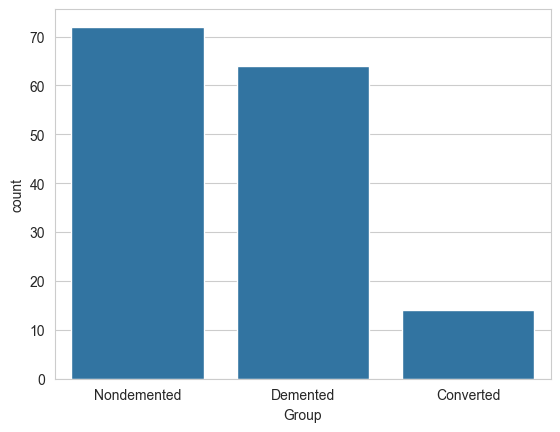

In [10]:
#see how many people have Alzheimer
#same person visits two or more time so only take the single visit data
sns.set_style("whitegrid")
ex_df = df.loc[df['Visit'] == 1]
sns.countplot(x='Group', data=ex_df)

C:\Users\Asus\AppData\Local\Temp\ipykernel_26184\2144647112.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ex_df['Group'] = ex_df['Group'].replace(['Converted'], ['Demented'])


<Axes: xlabel='Group', ylabel='count'>

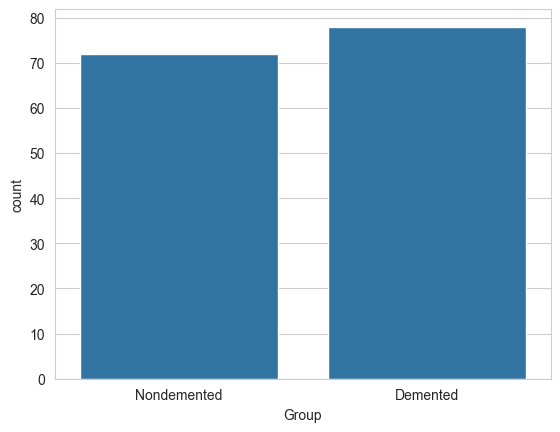

In [11]:
#We have three groups so convert Converted Group Into Demented

ex_df['Group'] = ex_df['Group'].replace(['Converted'], ['Demented'])
df['Group'] = df['Group'].replace(['Converted'], ['Demented'])
sns.countplot(x='Group', data=ex_df)

In [12]:
# bar drawing function
def bar_chart(feature):
    Demented = ex_df[ex_df['Group']=='Demented'][feature].value_counts()
    Nondemented = ex_df[ex_df['Group']=='Nondemented'][feature].value_counts()
    df_bar = pd.DataFrame([Demented,Nondemented])
    df_bar.index = ['Demented','Nondemented']
    df_bar.plot(kind='bar',stacked=True, figsize=(8,5))
    print(df_bar)

M/F           M   F
Demented     40  38
Nondemented  22  50


Text(0.5, 1.0, 'Gender and Demented rate')

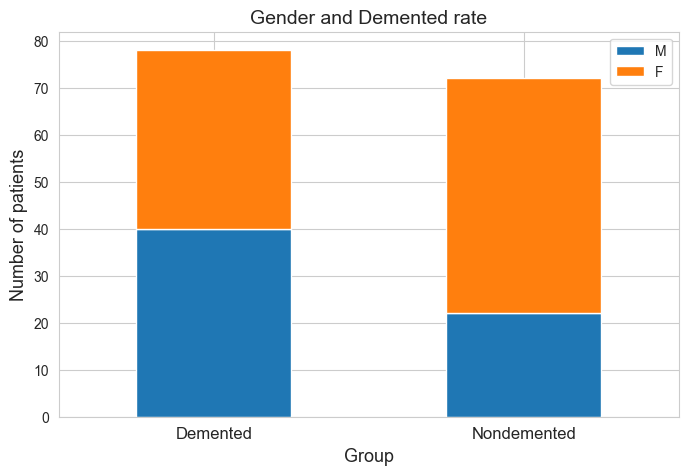

In [13]:
# Gender  and  Group ( Female=0, Male=1)
bar_chart('M/F')
plt.xlabel('Group',fontsize=13)
plt.xticks(rotation=0,fontsize=12)
plt.ylabel('Number of patients',fontsize=13)
plt.legend()
plt.title('Gender and Demented rate',fontsize=14)

In [14]:
#convet the charecter data into numeric
group_map = {"Demented": 1, "Nondemented": 0}

df['Group'] = df['Group'].map(group_map)
df['M/F'] = df['M/F'].replace(['F','M'], [0,1])

C:\Users\Asus\AppData\Local\Temp\ipykernel_26184\855724519.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['M/F'] = df['M/F'].replace(['F','M'], [0,1])


<Axes: >

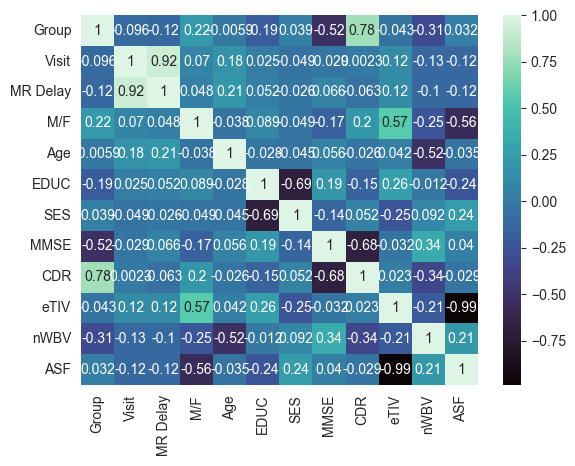

In [16]:
numeric_columns = df.select_dtypes(include=np.number).columns
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='mako')


In [17]:
# Encode columns into numeric
from sklearn.preprocessing import LabelEncoder
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Subject ID  373 non-null    int32
 1   MRI ID      373 non-null    int32
 2   Group       373 non-null    int64
 3   Visit       373 non-null    int64
 4   MR Delay    373 non-null    int64
 5   M/F         373 non-null    int64
 6   Hand        373 non-null    int32
 7   Age         373 non-null    int64
 8   EDUC        373 non-null    int64
 9   SES         373 non-null    int64
 10  MMSE        373 non-null    int64
 11  CDR         373 non-null    int64
 12  eTIV        373 non-null    int64
 13  nWBV        373 non-null    int64
 14  ASF         373 non-null    int64
dtypes: int32(3), int64(12)
memory usage: 39.5 KB


# ANN Model


In [19]:
#build the ANN model

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import Sequential
from keras.layers import Dense

X = df.drop('Group', axis=1)
y = df['Group']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


#save the model


In [27]:
model = Sequential()
model.add(Dense(units=8, activation='relu', input_dim=X_train.shape[1]))  # Update input_dim to match the number of features
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()





d:\kuliah\Semester 6\ML\Tugas 2 SVM\svm_c\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 8)              │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 201 (804.00 B)

 Trainable params: 201 (804.00 B)

 Non-trainable params: 0 (0.00 B)

In [29]:
import tensorflow as tf
# make custom callback function
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.95:
            print("\nAkurasi telah mencapai lebih dari 95%!")
            self.model.stop_training = True
            
callbacks = myCallback()

In [30]:


# Train the model
model.history = model.fit(X_train, y_train, 
                          epochs=100, batch_size=10, 
                          validation_split=0.2, 
                          callbacks=[callbacks], verbose=1)


Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5224 - loss: 0.9464 - val_accuracy: 0.4833 - val_loss: 0.9050
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5129 - loss: 0.8878 - val_accuracy: 0.4833 - val_loss: 0.8271
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5451 - loss: 0.8408 - val_accuracy: 0.4833 - val_loss: 0.7755
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6060 - loss: 0.7438 - val_accuracy: 0.4833 - val_loss: 0.7410
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5338 - loss: 0.7372 - val_accuracy: 0.4833 - val_loss: 0.7100
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5892 - loss: 0.6938 - val_accuracy: 0.5833 - val_loss: 0.6874
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5192 - loss: 0.7282 - val_accuracy: 0.5833 - val_loss: 0.6664
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6375 - loss: 0.6807 - val_accuracy: 0.6000 - v

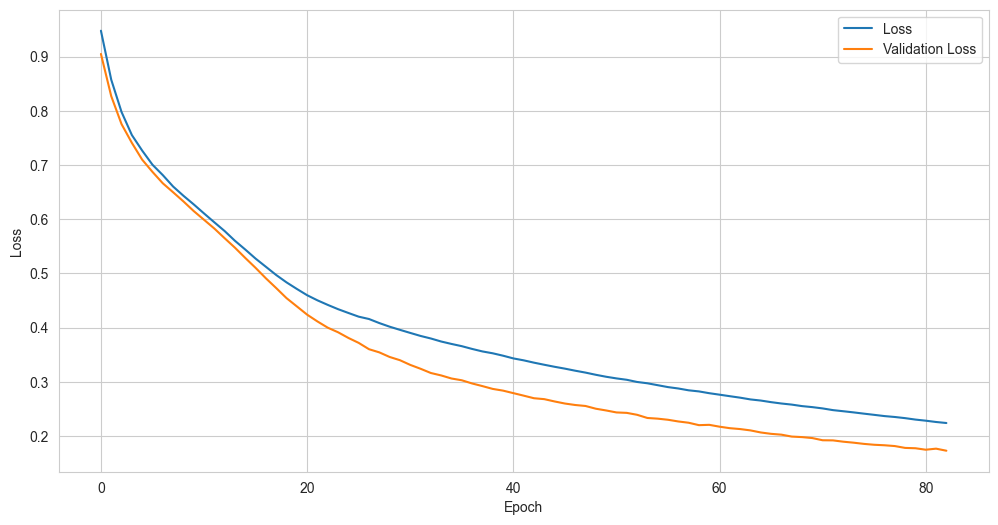

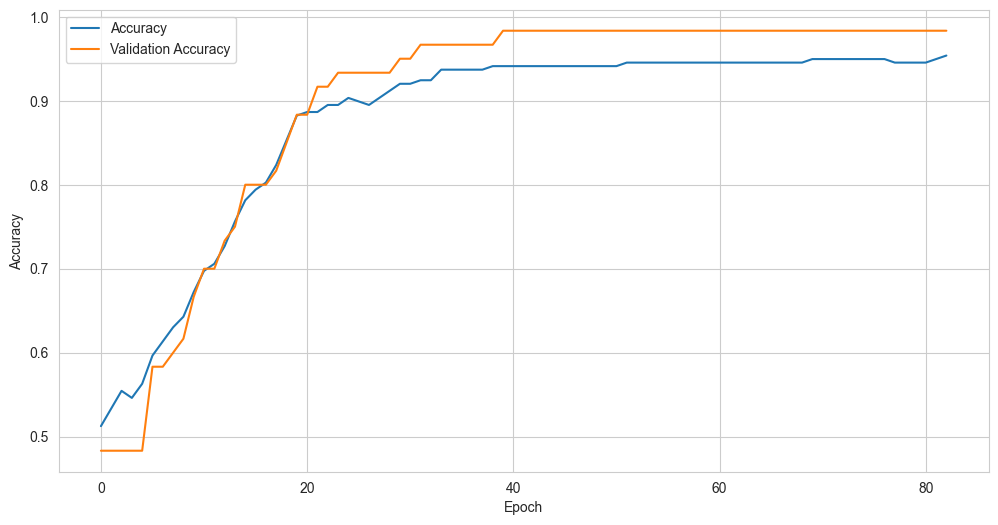

In [31]:
# loss plot
plt.figure(figsize=(12, 6))
plt.plot(model.history.history['loss'], label='Loss')
plt.plot(model.history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# accuracy plot
plt.figure(figsize=(12, 6))
plt.plot(model.history.history['accuracy'], label='Accuracy')
plt.plot(model.history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [32]:
#print the model accuracy and loss
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss:.2f}')
print(f'Accuracy: {accuracy*100:.2f}%')


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8803 - loss: 0.3051 
Loss: 0.28
Accuracy: 89.33%


In [35]:
#evaluate the model
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))



3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
[[32  6]
 [ 2 35]]
              precision    recall  f1-score   support

           0       0.94      0.84      0.89        38
           1       0.85      0.95      0.90        37

    accuracy                           0.89        75
   macro avg       0.90      0.89      0.89        75
weighted avg       0.90      0.89      0.89        75



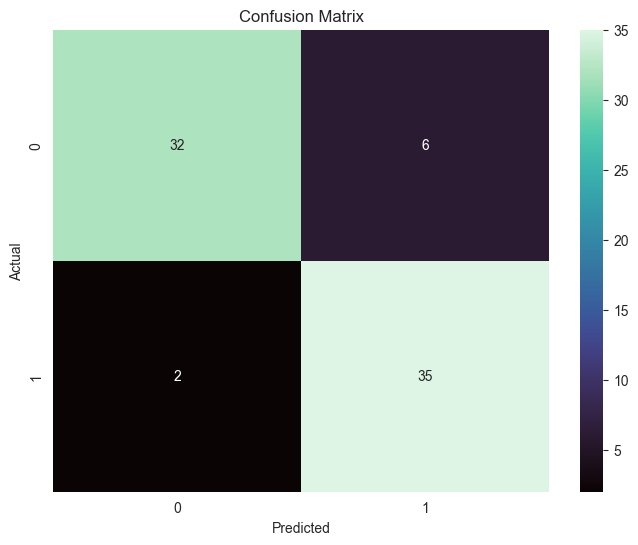

In [36]:
#visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='mako', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [37]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
# metrics evaluasi
akurasi = accuracy_score(y_test, y_pred)
print(f'Akurasi: {akurasi*100:.2f}%')
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall*100:.2f}%')
presisi = precision_score(y_test, y_pred)
print(f'Presisi: {presisi*100:.2f}%')
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1*100:.2f}%')

Akurasi: 89.33%
Recall: 94.59%
Presisi: 85.37%
F1 Score: 89.74%


In [42]:
#predict with dummy data

dummy_data = {'Subject ID': [1], 'MRI ID': [1], 'Group': [0], 'Visit': [1], 'MR Delay': [0], 'M/F': [0], 'Hand': [0], 'Age': [74], 'EDUC': [2], 'SES': [2], 'MMSE': [30], 'CDR': [0], 'eTIV': [1], 'nWBV': [1], 'ASF': [1]}
dummy_df = pd.DataFrame(dummy_data)
dummy_df.drop('Group', axis=1, inplace=True)
dummy_df = sc.transform(dummy_df)
prediction = model.predict(dummy_df)
prediction = (prediction > 0.5)
print(f'Prediction: {prediction[0][0]}')





1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Prediction: False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Prediction: False


In [46]:
%pip install pipreqsnb

Note: you may need to restart the kernel to use updated packages.


In [49]:
!pipreqsnb ANN_Klasifikasi.ipynb

pipreqs  --savepath requirements.txt d:\kuliah\Semester 6\21081107010033_Pertemuan_11_ANN\__temp_pipreqsnb_folder


Usage:
    pipreqs [options] [<path>]
